# Python for Creating CSV and Preliminary Reporting

In [1]:
import csv
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

%matplotlib inline
plt.style.use('ggplot')

## Load Data and Write to CSV


In [45]:
with open("roman-amphitheaters.geojson") as f:
    j = json.load(f)

In [46]:
# If there is one, I'd welcome a more pythonic approach. One that 
# accomodates the variable data model supported by JSON.

d = []
for feature in j['features']:
    
    # Check for optional properties

    if 'latintoponym' in feature['properties'].keys():
        latintoponym = feature['properties']['latintoponym']
    else:
        latintoponym = ''    

    if 'welchid' in feature['properties'].keys():
        welchid = feature['properties']['welchid']
    else:
        welchid = ''

    if 'golvinid' in feature['properties'].keys():
        golvinid = feature['properties']['golvinid']
    else:
        golvinid = ''

    if 'buildingtype' in feature['properties'].keys():
        buildingtype = feature['properties']['buildingtype']
    else:
        buildingtype = ''
        
    if 'buildingtype' in feature['properties'].keys():
        buildingtype = feature['properties']['buildingtype']
    else:
        buildingtype = ''
 
    if 'chronogroup' in feature['properties'].keys():
        chronogroup = feature['properties']['chronogroup']
    else:
        chronogroup = ''

    secondcentury = True
    if 'exclude' in feature['properties'].keys():
        secondcentury = False

    if 'capacity' in feature['properties'].keys():
        capacity = feature['properties']['capacity']['quantity']
    else:
        capacity = ''

    if 'province' in feature['properties'].keys():
        romanregion = feature['properties']['province']
    elif 'region' in feature['properties'].keys():
        romanregion = feature['properties']['region']
    else:
        romanregion = ''
        
    arenamajor = ''
    arenaminor = ''
    extmajor = ''
    extminor = ''
    exteriorheight = ''
    if 'dimensions' in feature['properties'].keys():
        dimensions = feature['properties']['dimensions']
        
        
        if 'arenamajor' in dimensions.keys():
            arenamajor = dimensions['arenamajor']

    
        if 'arenaminor' in dimensions.keys():
            arenaminor = dimensions['arenaminor']
            
        
        if 'exteriormajor' in dimensions.keys():
            extmajor = dimensions['exteriormajor']

        
        if 'exteriorminor' in dimensions.keys():
            extminor = dimensions['exteriorminor']
            
        
        if 'exteriorheight' in dimensions.keys():
            exteriorheight = dimensions['exteriorheight']
            

    d.append((feature['id'],
              feature['properties']['title'],
              feature['properties']['label'],
              latintoponym,
              feature['properties']['pleiades'],
              welchid,
              golvinid,
              buildingtype,
              chronogroup,
              secondcentury,
              capacity,
              feature['properties']['moderncountry'],
              romanregion,
              arenamajor,
              arenaminor,
              extmajor,
              extminor,
              exteriorheight,
              feature['geometry']['coordinates'][0],
              feature['geometry']['coordinates'][1],
              feature['geometry']['coordinates'][2]))

rdf = pd.DataFrame(d, columns=(
 'id',    # short id
 'title', # longer title
 'label', # short label
 'latintoponym', # latin toponym
 'pleiades', # pleiades https uri
 'welchid',  # id in Welch
 'golvinid', # id in Golvin
 'buildingtype',  # usually 'amphitheater'
 'chronogroup',   # label for the chronological group
 'secondcentury', # is this an amphitheater that was in use in 2nd century
 'capacity',    # capacity as integer
 'modcountry',  # modern country
 'romanregion', # province or augustan region of italy
 'arenamajor', # long axis of arena in meters
 'arenaminor', # short axis of arena in meters
 'extmajor',   # long axis of exterior
 'extminor', # short axis of exterior
 'exteriorheight',   # height of exterior wall if known
 'latitude', # latitude
 'longitude', # longitude
 'elevation'  # elevation in meters.
 )) 

rdf[['capacity','elevation','arenamajor','arenaminor',
        'extmajor','extminor','exteriorheight']] = rdf[['capacity','elevation','arenamajor',
        'arenaminor','extmajor','extminor','exteriorheight']].apply(pd.to_numeric)

In [47]:
rdf.to_csv("roman-amphitheaters.csv", index = False, quoting = csv.QUOTE_NONNUMERIC)

## Basic Reporting

In [40]:
rdf.head(2)

,id,title,label,latintoponym,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,...,modcountry,romanregion,arenamajor,arenaminor,extmajor,extminor,exteriorheight,latitude,longitude,elevation
0,duraEuroposAmphitheater,Amphitheater at Dura Europos,Dura,,https://pleiades.stoa.org/places/893989,,129,amphitheater,severan,False,...,Syria,syria,31.0,25.0,50.0,44.0,NaN,40.728926,34.749855,223
1,arlesAmphitheater,Amphitheater at Arles,Arles,Arelate,https://pleiades.stoa.org/places/148217,,154,amphitheater,flavian,True,...,France,narbonensis,47.0,32.0,136.0,107.0,NaN,4.631111,43.677778,21


In [48]:
rdf.describe()

,capacity,arenamajor,arenaminor,extmajor,extminor,exteriorheight,latitude,longitude,elevation
count,122.000000,148.000000,147.000000,177.000000,163.000000,3.000000,260.000000,260.000000,260.000000
mean,12219.147541,56.922297,37.934694,97.351017,77.006196,41.483333,10.665040,42.223168,191.407692
std,9219.827280,14.180913,8.441243,29.683716,24.790980,9.859048,9.008302,4.968707,210.000926
min,1000.000000,25.000000,19.000000,39.600000,34.000000,32.450000,-8.493330,31.608189,-121.000000
25%,5207.500000,47.000000,32.850000,77.000000,59.200000,36.225000,5.514918,38.480299,32.000000
50%,9700.000000,58.000000,38.500000,95.000000,75.000000,40.000000,10.954128,42.089044,117.500000
75%,16000.000000,66.250000,42.850000,116.500000,94.000000,46.000000,14.250144,45.479995,282.250000
max,50000.000000,101.000000,62.000000,189.000000,156.000000,52.000000,40.728926,55.602600,1170.000000


In [49]:
# Confirm that CSV is readable
# It would be nice if the "numeric pattern" string survived as strings.
pd.read_csv("roman-amphitheaters.csv", quoting = 2).describe()

,welchid,golvinid,capacity,arenamajor,arenaminor,extmajor,extminor,exteriorheight,latitude,longitude,elevation
count,18.000000,75.000000,122.000000,148.000000,147.000000,177.000000,163.000000,3.000000,260.000000,260.000000,260.000000
mean,9.777778,105.973333,12219.147541,56.922297,37.934694,97.351017,77.006196,41.483333,10.665040,42.223168,191.407692
std,5.704029,62.577946,9219.827280,14.180913,8.441243,29.683716,24.790980,9.859048,9.008302,4.968707,210.000926
min,1.000000,12.000000,1000.000000,25.000000,19.000000,39.600000,34.000000,32.450000,-8.493330,31.608189,-121.000000
25%,5.250000,61.500000,5207.500000,47.000000,32.850000,77.000000,59.200000,36.225000,5.514918,38.480299,32.000000
50%,9.500000,105.000000,9700.000000,58.000000,38.500000,95.000000,75.000000,40.000000,10.954128,42.089044,117.500000
75%,14.500000,138.500000,16000.000000,66.250000,42.850000,116.500000,94.000000,46.000000,14.250144,45.479995,282.250000
max,19.000000,298.000000,50000.000000,101.000000,62.000000,189.000000,156.000000,52.000000,40.728926,55.602600,1170.000000


In [11]:
# which have heights
rdf[rdf.exteriorheight > 0]

,id,title,label,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,capacity,modcountry,romanregion,arenamajor,arenaminor,extmajor,extminor,exteriorheight,latitude,longitude,elevation
4,romeFlavianAmphitheater,Flavian Amphitheater at Rome,Colosseum,https://pleiades.stoa.org/places/423025,,152,amphitheater,flavian,True,50000.0,Italy,regio-i,83.00,48.00,189.00,156.0,52.00,12.492269,41.890169,22
90,thysdrusAmphitheater,Amphitheater at Thysdrus,Thysdrus (lg.),https://pleiades.stoa.org/places/324835,,,amphitheater,post-severan,False,35000.0,Tunisia,proconsularis,65.00,39.00,148.00,122.0,40.00,10.706939,35.296390,111
97,pulaAmphitheater,Amphitheater at Pula,Pula,https://pleiades.stoa.org/places/197448,,,amphitheater,julio-claudian,True,26000.0,Croatia,regio-x,67.95,41.65,132.45,105.1,32.45,13.850243,44.873229,16
98,carmonaAmphitheater,Amphitheater at Carmona,Carmona,https://pleiades.stoa.org/places/256058,17,,amphitheater,caesarean,True,8000.0,Spain,baetica,67.95,41.65,132.45,105.1,32.45,-5.650907,37.469674,223


In [50]:
# which have heights
rdf[pd.isnull(rdf.extmajor) ][['id','latintoponym','golvinid','extmajor','arenamajor','longitude','latitude']]

,id,latintoponym,golvinid,extmajor,arenamajor,longitude,latitude
3,ludusMagnusArena,,,NaN,NaN,41.889950,12.494913
13,pozzuoliEarlyAmphitheater,Puteoli,,NaN,NaN,40.826239,14.127615
16,hadrianVillaAmphitheater,Villa Hadriani,,NaN,NaN,41.941708,12.778929
20,nijmegenAmphitheater,Ulpia Noviomagus,,NaN,NaN,51.838523,5.878859
22,carnuntumLudus,Carnuntum,,NaN,NaN,48.109807,16.848689
37,parisAmphitheater,Lutetia Parisiorum,,NaN,NaN,48.845097,2.352855
39,cyreneAmphitheater,,,NaN,32.7,32.824526,21.850808
46,gennesAmphitheater,Geinum,,NaN,44.0,47.335219,-0.238606
47,scythopolisNysaAmphitheater,,,NaN,NaN,32.498395,35.501631
56,lixusAmphitheater,,,NaN,NaN,35.199900,-6.108468


## Basic Mapping

In [8]:
rgdf = gpd.read_file("roman-amphitheaters.geojson")

In [9]:
rgdf.crs

{'init': 'epsg:4326'}

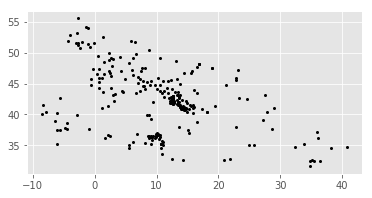

In [10]:
rgdf.plot(color = 'black')